In [36]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("all_matches.csv")
df

,year,team,seed,finish
0,1984,Southern California,1,1
1,1984,Tennessee,3,2
2,1984,Cheyney,3,4
3,1984,Louisiana Tech,1,4
4,1984,Georgia,1,8
...,...,...,...,...
2407,2022,Mercer University,15,64
2408,2022,University of the Incarnate Word,16,68
2409,2022,DePaul University,11,68
2410,2022,Mount St. Mary's University,16,68


In [29]:
finishes = list(df["finish"].unique())
finishes.sort()
df["height"] = df["finish"].apply(
    lambda x: len(finishes) - finishes.index(x)
)
df

,year,team,seed,finish,height
0,1984,Southern California,1,1,8
1,1984,Tennessee,3,2,7
2,1984,Cheyney,3,4,6
3,1984,Louisiana Tech,1,4,6
4,1984,Georgia,1,8,5
...,...,...,...,...,...
2407,2022,Mercer University,15,64,2
2408,2022,University of the Incarnate Word,16,68,1
2409,2022,DePaul University,11,68,1
2410,2022,Mount St. Mary's University,16,68,1


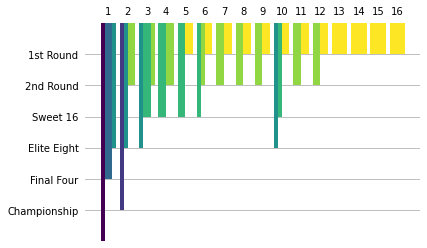

In [70]:
def plot_year(year):
    df_sub = df[(df["year"] == year) & (df["finish"] < 68)]

    fig, ax = plt.subplots()

    my_cmap = plt.get_cmap("viridis")

    offsets = defaultdict(lambda: -0.4)
    for i, row in df_sub.iterrows():
        offset = row["seed"] + offsets[row["seed"]]
        offsets[row["seed"]] += 0.2
        ax.bar(
            offset,
            row["height"],
            0.2,
            align="edge",
            color=my_cmap((8 - row["height"]) / 6),
            capstyle="round"
        )

    ax.set_ylim([8, 1])
    ax.set_yticks(
        range(2, 8),
        labels=[
            "1st Round",
            "2nd Round",
            "Sweet 16",
            "Elite Eight",
            "Final Four",
            "Championship",
        ],
    )
    ax.set_yticklabels
    ax.set_xticks(range(1, 17))
    ax.grid(axis="y")
    ax.set_axisbelow(True)
    ax.xaxis.set_tick_params(labelbottom=False, labeltop=True)
    ax.spines[["top", "right", "bottom", "left"]].set_visible(False)

    for tick in ax.yaxis.get_major_ticks() + ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)


plot_year(2022)

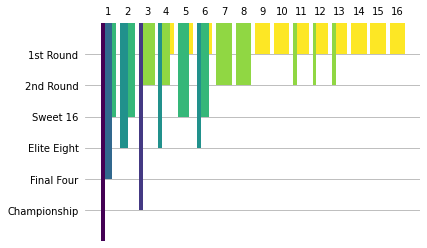

In [67]:
plot_year(2021)

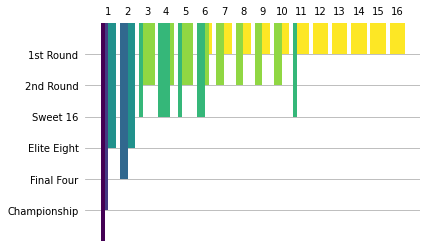

In [68]:
plot_year(2019)

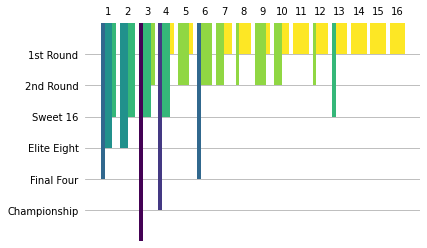

In [77]:
plot_year(1994)